<a href="https://colab.research.google.com/github/Adam129511/sieci2/blob/main/Sie%C4%87_neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sieć Neuronowa Gęsta - Perceptron Wielowarstwowy

Import bibliotek

In [1]:
import keras
from keras.datasets import mnist #moduł datasets, mnist ma w sobie zapisane odręczne cyfry
from keras.models import Sequential # moduł medels, klasa sequnential
from keras.layers import Dense #importujemy warstwę gestą
from keras.optimizers import RMSprop

Załadowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #tupla, dane są niemodyfikowalne tym się różni od listy



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape #Shape zwraca 3 dane gdzie: 1dana- liczba próbek (czyli całych tablic), 2dana- liczba tablic w próbce 3dana-liczba elementów w tablicy



(60000, 28, 28)

Eksploracja danych


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych:{}'.format (X_train.shape[0]))
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:{}'.format (X_train[0].shape))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka:(28, 28)


(-0.5, 27.5, 27.5, -0.5)

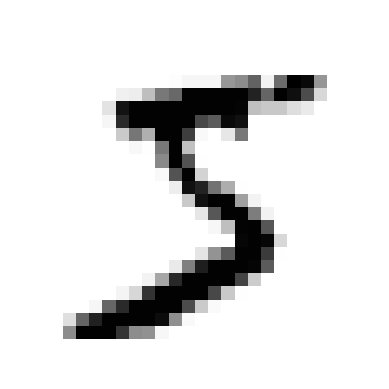

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys') # cmap zamienia domyslny kolor na skale szarości
plt.axis('off')


#Wyświetlenie kilku obrazków

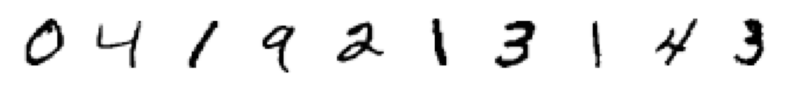

In [6]:
plt.figure(figsize=(10, 10))
for i in range(1,11): #Wypisuje liczby od 1 do 10 włącznie
    plt.subplot(1, 10, i)#pierwsze dwa parametry decydują o rozmiarze obrazków, natomiast ostatni parametr to numer obrazka
    plt.axis('off')
    plt.imshow(X_train[i], cmap = 'Greys')
plt.show()


Etykiety


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#Przygotowanie danych

In [8]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

#Budowa Modelu

In [11]:
model = Sequential() #Tworzymy obiekt klasy sequenntial()
model.add(Dense(units=512, activation='relu', input_shape = (28*28,)))  #Dodajemy do obiektu warstwy gęste
model.add(Dense(units=512, activation='relu'))#Dodajemy warstwę ukrytą
model.add(Dense(units=10, activation='softmax'))#Warstwa wyjściowa, 10 określa liczbę warstw

model.summary()#Wyświetlenie modelu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = RMSprop(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'] ) #Metodą compile, kompilujemy nasz model i przekazujemy takie parametry jak optymalizator

#Trenowanie modelu

In [15]:
history = model.fit(X_train, y_train, batch_size= 128, epochs=20, validation_data=(X_test,y_test)) # Batch_size określa po ilu próbkach maja być aktualizowane dane, epochs określa ile razy dane mają przechodzić przez sieć

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2171 - accuracy: 0.9323 - val_loss: 0.1088 - val_accuracy: 0.9658
Epoch 2/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0804 - accuracy: 0.9756 - val_loss: 0.1096 - val_accuracy: 0.9657
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0876 - val_accuracy: 0.9753
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0390 - accuracy: 0.9873 - val_loss: 0.0737 - val_accuracy: 0.9818
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0847 - val_accuracy: 0.9799
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0900 - val_accuracy: 0.9805
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0898 - val_accuracy: 0.9804

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2086 - accuracy: 0.9799


[0.20864133536815643, 0.9799000024795532]

In [17]:
history.history#zwraca wartości dla każdej epoki

{'loss': [0.21707433462142944,
  0.08044907450675964,
  0.053533971309661865,
  0.03903985023498535,
  0.02813880145549774,
  0.023563556373119354,
  0.018569326028227806,
  0.01598261296749115,
  0.01368709933012724,
  0.010958491824567318,
  0.010410887189209461,
  0.008160765282809734,
  0.008272573351860046,
  0.00721325958147645,
  0.006318472791463137,
  0.006152022164314985,
  0.005697596352547407,
  0.0070513226091861725,
  0.0060835182666778564,
  0.005366314202547073],
 'accuracy': [0.9322999715805054,
  0.975600004196167,
  0.9832166433334351,
  0.9873166680335999,
  0.9912166595458984,
  0.9928333163261414,
  0.9943333268165588,
  0.9950000047683716,
  0.9959499835968018,
  0.9965833425521851,
  0.9971833229064941,
  0.9976333379745483,
  0.9976333379745483,
  0.9978500008583069,
  0.998033344745636,
  0.9981333613395691,
  0.9985166788101196,
  0.9983500242233276,
  0.9984999895095825,
  0.9986166954040527],
 'val_loss': [0.10881180316209793,
  0.10958974808454514,
  0.087

#Wykres dokładności i strat

In [38]:
def make_accuracy_plot(history):
     #Funkcja zwraca wykres dokładośći (accuracy) modelu na zbiorze treningowym i walidacyjnym
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize = (10,8))
    plt.plot(epochs, acc, label = "dokładność trenowania", marker = 'o')
    plt.plot(epochs, val_acc, label = "dokładność walidacji", marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history): #Funkcja zwraca wykres straty (loss) na zbiorze treningowym i walidacyjnym
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs= range(1, len(loss)+1)

    plt.figure(figsize = (10,8))
    plt.plot(epochs, loss, label = "Strata trenowania", marker = 'o')
    plt.plot(epochs, val_loss, label = "Strata walidacji", marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('epoki')
    plt.ylabel('Strata')
    plt.show()


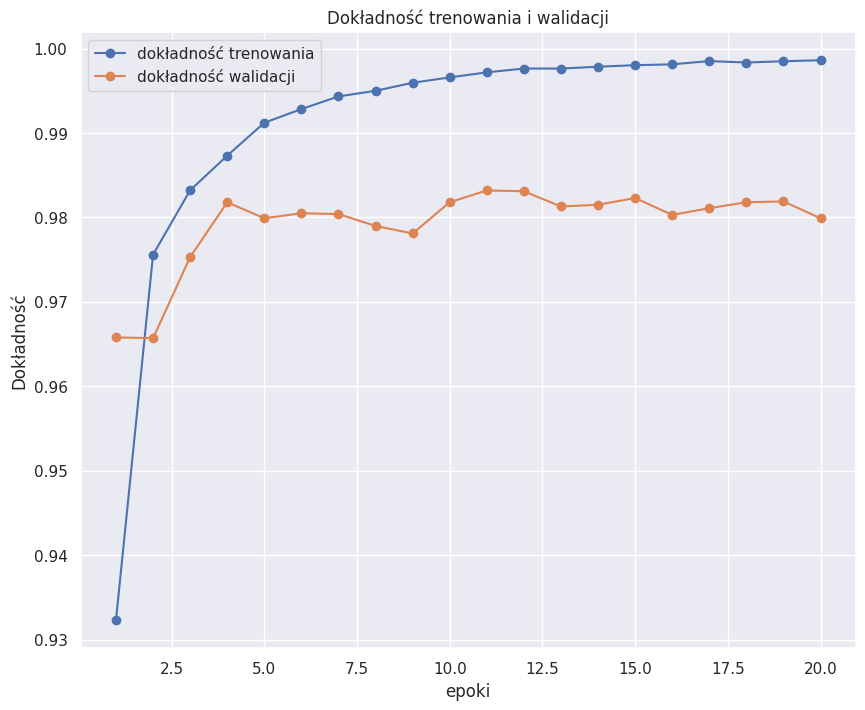

In [39]:
make_accuracy_plot(history)

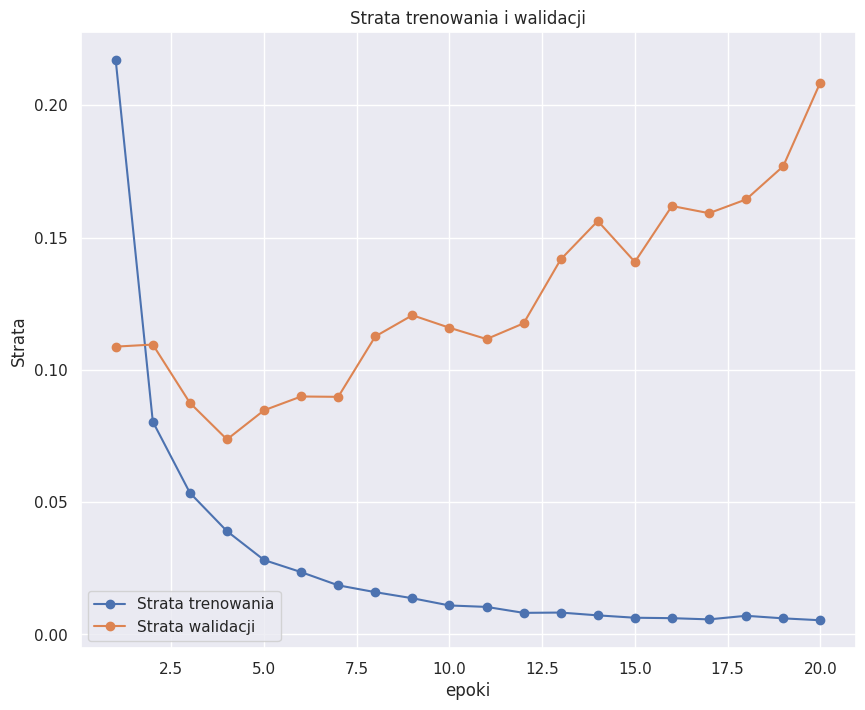

In [40]:
make_loss_plot(history)

Na danych testowych podczas uczenia strata maleje  a potem zaczyna rosnąć. W momencie gdy nasz model zaczyna gorzej performować można. Przy około 7 epoko zaczyna dziać się przetrenowanie